# Integrales 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
import shapefile as shp
#Biblioteca para integrales
import scipy.integrate as integrate
from scipy.integrate import simps
from scipy.stats import norm
#Regresiones lineares
from sklearn.linear_model import LinearRegression

In [8]:
data = pd.read_csv("../data.csv")

In [9]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (15,18)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'b')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [10]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [11]:
datos = shp.Reader("../alcaldias.shp")
alcaldias =  read_shapefile(datos)
alcaldias


,nomgeo,cve_mun,cve_ent,cvegeo,municipio,coords
0,Milpa Alta,009,09,09009,9,"[(-98.99723373999994, 19.22731068999911), (-98..."
1,Benito Juárez,014,09,09014,14,"[(-99.13679462999991, 19.401556719999114), (-9..."
2,Gustavo A. Madero,005,09,09005,5,"[(-99.11859756999995, 19.584461719999087), (-9..."
3,Azcapotzalco,002,09,09002,2,"[(-99.18230696999991, 19.507479249999136), (-9..."
4,Iztacalco,006,09,09006,6,"[(-99.05583625999996, 19.421961229999074), (-9..."
5,Álvaro Obregón,010,09,09010,10,"[(-99.1887066199999, 19.394747649999143), (-99..."
6,Xochimilco,013,09,09013,13,"[(-99.09869648999994, 19.319641419999144), (-9..."
7,Venustiano Carranza,017,09,09017,17,"[(-99.10894588999996, 19.452733629999152), (-9..."
8,Tlalpan,012,09,09012,12,"[(-99.19628607999992, 19.30227816999913), (-99..."
9,Cuajimalpa de Morelos,004,09,09004,4,"[(-99.2569793499999, 19.400431689999134), (-99..."


In [12]:
data = pd.read_csv("../data.csv")

In [13]:
data = np.random.randint(1,5,15)

In [14]:
rango = np.arange(0,1,.001)

In [15]:
funcion=-rango**2+1

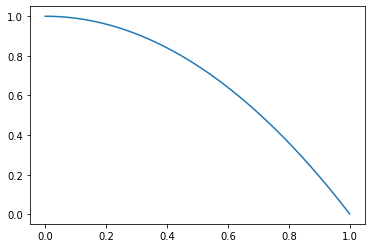

In [16]:
plt.plot(rango,funcion)

In [17]:
#Integral numerica = Suma de Riemman
total = 0
for i in range(0,len(rango)-1):
    base = rango[i+1] - rango [i]
    altura = -rango[i+1]**2+1
    area = base * altura
    total = total + area
print(total)

0.6661665000000008


In [18]:
#Ejemplo de una integral con la biblioteca
rango = np.arange(1,2,.001)
rango
def karina(x):
    return x**3
#Funcion para las integrales
simps(karina(rango),rango)

3.742005998749121

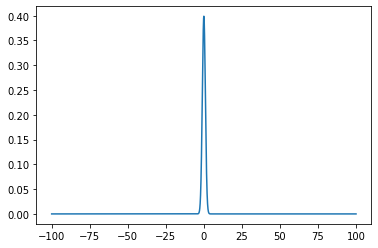

In [19]:
#Función normal
rango = np.arange(-100,100,.001)
plt.plot(rango,norm.pdf(rango))

In [20]:
#Integral de la función normal de arriba
simps(norm.pdf(rango),rango)

1.0

In [21]:
x=np.array([1,5,3,6,9,8]).reshape(-1,1)
y=np.array([3,3,1,6,5,4])

In [22]:
data = pd.read_csv("../carpetas-de-investigacion-pgj-de-la-ciudad-de-mexico_2019-10-01 12_45.csv")
data = data[["fecha_hechos","categoria_delito"]]
data = data[data.categoria_delito.str.contains("HOMICIDIO DOLOSO")]
data["fecha_hechos"] = pd.to_datetime(data["fecha_hechos"], format="%Y-%m-%d %H:%M")
data = data[data.fecha_hechos.dt.year==2018]

In [46]:
data = pd.read_csv("../data.csv")
data["fecha_hechos"] = pd.to_datetime(data["fecha_hechos"],format="%Y-%m-%d %H:%M:%S",errors="coerce")

In [47]:
#Delitos existentes
data.delito.unique().tolist()

['VIOLENCIA FAMILIAR',
 'ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO',
 'TRAFICO DE INFANTES',
 'USURPACIÓN DE IDENTIDAD',
 'NARCOMENUDEO POSESION SIMPLE',
 'ROBO A NEGOCIO SIN VIOLENCIA',
 'ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA',
 'ROBO A NEGOCIO CON VIOLENCIA',
 'DENUNCIA DE HECHOS',
 'FRAUDE',
 'ROBO DE ACCESORIOS DE AUTO',
 'ROBO A PASAJERO EN TROLEBUS SIN VIOLENCIA',
 'ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA',
 'VIOLACION',
 'ROBO DE DINERO',
 'AMENAZAS',
 'QUEBRANTAMIENTO DE SELLOS',
 'ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VIOLENCIA',
 'DAÑO EN PROPIEDAD AJENA INTENCIONAL A CASA HABITACION',
 'ROBO DE OBJETOS',
 'ABUSO DE AUTORIDAD',
 'ROBO A REPARTIDOR CON VIOLENCIA',
 'DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A BIENES INMUEBLES',
 'FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO',
 'DISCRIMINACION',
 'ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLENCIA',
 'ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA',
 'DAÑO EN PROPI

In [48]:
data.categoria_delito.unique().tolist()

['DELITO DE BAJO IMPACTO',
 'ROBO A NEGOCIO CON VIOLENCIA',
 'HECHO NO DELICTIVO',
 'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA',
 'VIOLACIÓN',
 'ROBO A REPARTIDOR CON Y SIN VIOLENCIA',
 'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA',
 'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA',
 'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO',
 'HOMICIDIO DOLOSO',
 'ROBO A CASA HABITACIÓN CON VIOLENCIA',
 'ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA',
 'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA',
 'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA',
 'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA',
 'SECUESTRO',
 'PLAGIO O SECUESTRO',
 'FEMINICIDIO']

In [49]:
data = data[data.categoria_delito== "HOMICIDIO DOLOSO"]

In [50]:
data

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
136,2016.0,Mayo,2016-05-20 00:40:00,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO DOLOSO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-4,UI-1SD,CUAUHTEMOC,CENTRO,2016.0,Mayo,2016-05-20 00:57:04,REPUBLICA DE PARAGUAY,REPUBLICA DE ARGENTINA Y REPUBLICA DE BRASIL,-99.131875,19.441507,"19.4415069998,-99.131875"
324,2016.0,Mayo,2016-05-20 21:00:00,HOMICIDIOS INTENCIONALES (OTROS),HOMICIDIO DOLOSO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-2,UI-2CD,GUSTAVO A MADERO,SIETE MARAVILLAS,2016.0,Mayo,2016-05-20 21:54:33,JARDINES DE BABILONIA,COLOSO DE RODAS,-99.144606,19.515712,"19.5157119998,-99.144606"
814,2016.0,Mayo,2016-05-24 00:10:00,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO DOLOSO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-6,UI-2CD,GUSTAVO A MADERO,SAN JUAN DE ARAGÓN I SECCIÓN,2016.0,Mayo,2016-05-24 00:38:15,CALLE 517,NaN,-99.092530,19.459148,"19.4591478439,-99.0925297753"
845,2016.0,Mayo,2016-05-24 09:15:00,HOMICIDIO POR ARMA BLANCA,HOMICIDIO DOLOSO,INVESTIGACIÓN EN MILPA ALTA,MIL-1,UI-3SD,MILPA ALTA,LA CONCEPCIÓN (VILLA MILPA ALTA),2016.0,Mayo,2016-05-24 11:17:45,CALLE VERACRUZ,NaN,-99.021609,19.183942,"19.1839422957,-99.0216085751"
965,2016.0,Mayo,2016-05-24 21:00:00,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO DOLOSO,INVESTIGACIÓN EN TLAHUAC,TLH-1,UI-3SD,TLAHUAC,MIGUEL HIDALGO,2016.0,Mayo,2016-05-24 22:06:38,ADRIANA,MUZIO CLEMENTI,-99.050839,19.296451,"19.2964508518,-99.0508389986"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015809,2020.0,Mayo,2020-05-23 10:07:00,HOMICIDIO POR GOLPES,HOMICIDIO DOLOSO,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN GUSTA...,GAM-6,UI-2CD,TLAHUAC,NUEVA TENOCHTITLÁN,2020.0,Mayo,2020-05-23 16:25:50,CANAL DE CHALCO,NaN,-99.058429,19.279878,"19.2798777976,-99.0584286005"
1015951,2020.0,Mayo,2020-05-24 20:35:00,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO DOLOSO,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN IZTAP...,IZP-9,UI-3SD,IZTAPALAPA,NaN,2020.0,Mayo,2020-05-24 20:35:09,AV. ERMITA IZTAPALAPA,NOTIFICACION HOSPITAL DE IZTAPALAPA,NaN,NaN,NaN
1016284,2020.0,Mayo,2020-05-27 07:15:00,HOMICIDIOS INTENCIONALES (OTROS),HOMICIDIO DOLOSO,FISCALÍA DE INVESTIGACIÓN ESTRATÉGICA DEL DELI...,2,1 CON DETENIDO 1 C/D,BENITO JUAREZ,ACTIPAN,2020.0,Mayo,2020-05-27 08:01:29,ACTIPAN,NaN,-99.179401,19.369873,"19.3698730058,-99.1794009115"
1016393,2020.0,Mayo,2020-05-27 17:50:00,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO DOLOSO,FISCALÍA DE INVESTIGACIÓN ESTRATÉGICA DEL DELI...,2,1 CON DETENIDO 1 C/D,GUSTAVO A MADERO,AMPLIACIÓN PROGRESO NACIONAL,2020.0,Mayo,2020-05-27 19:28:32,PERLILLAR,CALLE 10,-99.161315,19.518775,"19.5187754191,-99.1613146544"


In [34]:
#Hora del día en donde hay más violaciones
data["fecha_hechos"] = pd.to_datetime(data["fecha_hechos"],format="%Y-%m-%d %H:%M:%S",errors="coerce")
data.groupby(data.fecha_hechos.dt.hour).count().nlargest(5,"ao_hechos")

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
fecha_hechos,,,,,,,,,,,,,,,,,,
22,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175
23,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148
20,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146
0,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142
21,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129


In [35]:
longitud = data[data.fecha_hechos.dt.hour==12]["longitud"].tolist()
latitud = data[data.fecha_hechos.dt.hour==12]["latitud"].tolist()
data = data.dropna()

C:\Users\sectei-3\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'cmaps'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


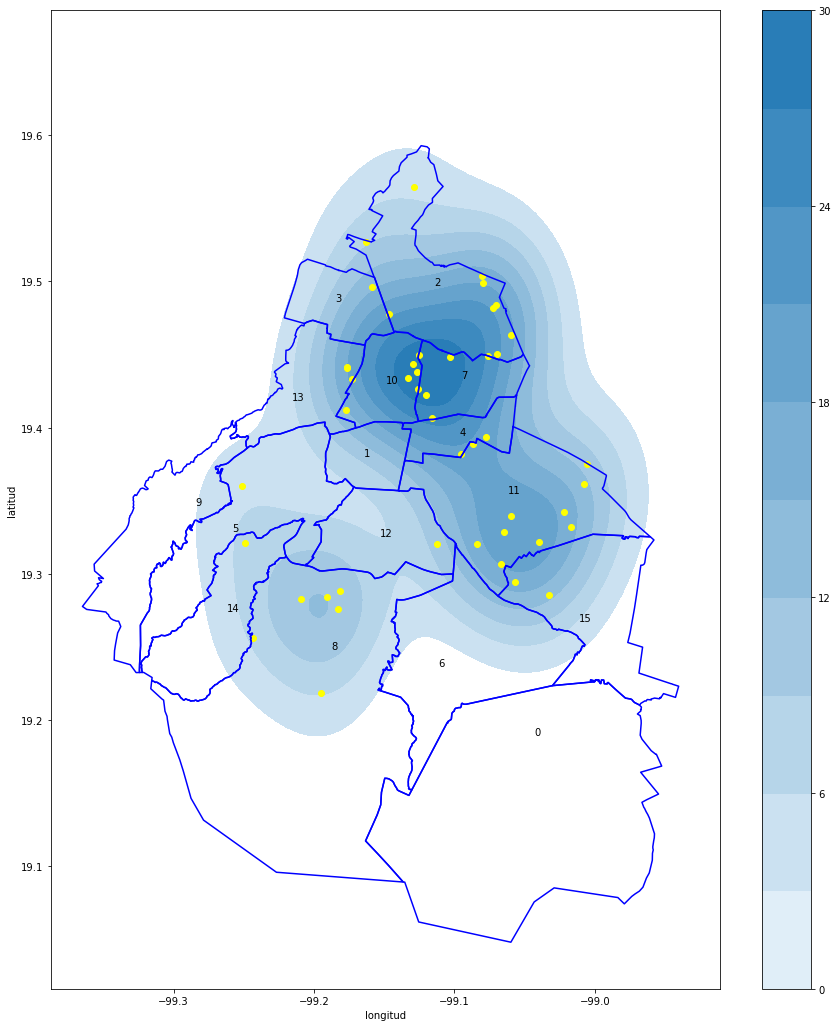

In [36]:
plot_map(datos)
sbn.kdeplot(data[data.fecha_hechos.dt.hour==12]["longitud"],data[data.fecha_hechos.dt.hour==12]["latitud"],cmaps="Reds",cbar=True,shade=True,shade_lowest=False)
plt.scatter(data[data.fecha_hechos.dt.hour==12]["longitud"],data[data.fecha_hechos.dt.hour==12]["latitud"],color="yellow")

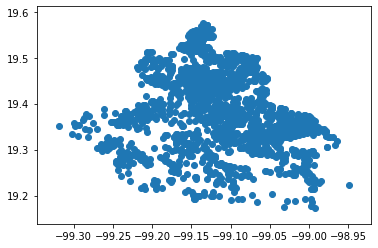

In [37]:
#Puntos en x y puntos en y
plt.scatter(data["longitud"],data["latitud"])

In [40]:
#La media, desviación estandar en x y Y
muX , stdX = norm.fit(data["longitud"])
muY , stdY = norm.fit(data["latitud"])

In [76]:
#Media y covarianza en dos dimensiones
mean = [muX, muY]
cov = [[stdX/4,0],[0,stdY/4]]
x, y = np.random.multivariate_normal(mean,cov,500).T

In [77]:
#Integral doble 
inicio = (-99.3,19.4)
final = (-99,19.5)
f = lambda y,x:x*y**2
integrate.dblquad(f,0,2,lambda x: 0, lambda x : 1)

(0.6666666666666667, 7.401486830834377e-15)

C:\Users\sectei-3\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'cmaps'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


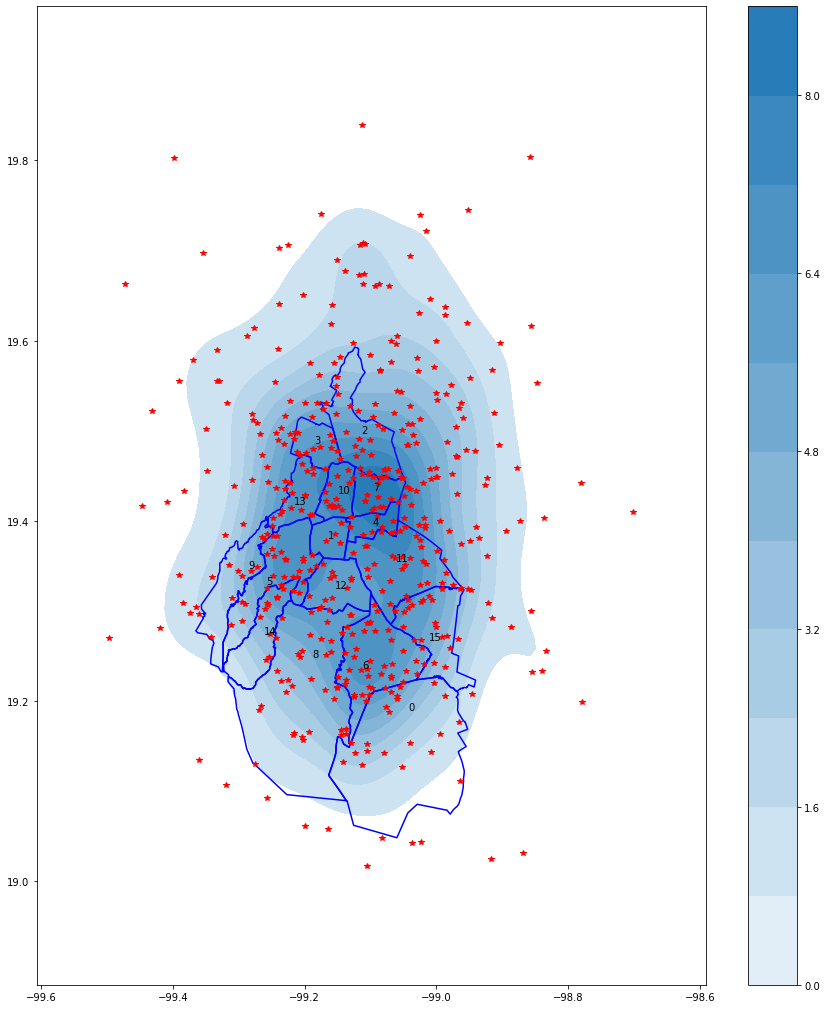

In [80]:
#Ploteo de una función normal multivariable
plot_map(datos)
sbn.kdeplot(x,y,cmaps="Reds",cbar=True,shade=True,shade_lowest=False)
#Distribución gaussiana
plt.plot(x,y,'*', color="red")
#plt.scatter(data["longitud"],data["latitud"],color="red")

In [81]:
'''
def funcion(x,y):
    return x,y
'''
t = np.arange(0,np.pi/2,0.1)

In [83]:
x, y = np.cos(y),np.sin(t)
integral = np.cos(t)*np.sin(t)*(((-np.sin(t))**2+(np.cos(t))**2)**.5)
simps(integral,t)

0.4974742632679769

In [85]:
#Segunda integral
integral = (4*np.cos(t))*((4*np.sin(t))**5)*(((-4*np.sin(t))**2+(4*np.cos(t))**2+.5))
simps(integral,t)

11091.15550471738

In [91]:
#Tercera integral
t = np.arange(1,3,.001)
integral = (t**3+np.log(t))*(2*t)
simps(integral,t)

102.51902899685471